# Data Simulation & Regression

---
**Instructions:** 

*  Take a copy of this notebook and answer the questions in Sections 2, 3, and 4. Add as many code and markdown cells as needed within those sections.
*  Answer the External Resources question in Section 5.

---

# **Section 1**: Data Simulation Engine
The code in this section provides the tools needed to simulate data given a set of `simulation_parameters` being provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# example set of simulation parameters
default_simulation_parameters = {
    "num_employees_per_company": 50,
    "satisfaction_variance": 1, 
    "data_collection_start_date": pd.to_datetime("2022-01-01"),
    "data_collection_end_date": pd.to_datetime("2023-12-31"),
    "remote_work_onset_date": pd.to_datetime("2023-01-01"),
    "remote_work_treatment_effect": 2,
    "satisfaction_levels": {"Rubicon":5.2, "Giggle": 6.1}
}

In [3]:
def simulate_data(simulation_parameters):
    data = []
    
    # create the date range for data collection
    dates = pd.date_range(
        start=simulation_parameters["data_collection_start_date"], 
        end=simulation_parameters["data_collection_end_date"], 
        freq='W' # weekly intervals between start and end
    )

    # set number of employees per company
    num_employees = simulation_parameters["num_employees_per_company"]
    for company in ['Rubicon', 'Giggle']:

        # company satisfaction parameters
        satisfaction_mean = simulation_parameters["satisfaction_levels"][company]
        satisfaction_variance = simulation_parameters["satisfaction_variance"]

        # simulate data collection
        for date in dates:
            time_at_company = (date - simulation_parameters["data_collection_start_date"]).days
            for i in range(num_employees):
                employee_age = np.random.randint(18, 60)
                satisfaction = np.random.normal(
                    satisfaction_mean,
                    satisfaction_variance
                )

                # treatment effect
                if date > simulation_parameters["remote_work_onset_date"]:
                    if company == "Giggle":
                        satisfaction += simulation_parameters["remote_work_treatment_effect"] 
                
                # save the data in a useful format
                datapoint = {
                    "date": date, 
                    "company": company,
                    "satisfaction": satisfaction,
                    "employee_id": f"{company[0]}{i}", # create a fake employee id by combining the company name initial letter and the loop index variable
                    "time_at_company": time_at_company,
                    "employee_age": employee_age
                } 
                data.append(datapoint)
    return pd.DataFrame(data)

In [4]:
df_default = simulate_data(default_simulation_parameters)

In [5]:
df_default

,date,company,satisfaction,employee_id,time_at_company,employee_age
0,2022-01-02,Rubicon,4.999562,R0,1,33
1,2022-01-02,Rubicon,5.209023,R1,1,38
2,2022-01-02,Rubicon,5.060302,R2,1,57
3,2022-01-02,Rubicon,4.626068,R3,1,57
4,2022-01-02,Rubicon,3.793625,R4,1,48
...,...,...,...,...,...,...
10495,2023-12-31,Giggle,7.935362,G45,729,46
10496,2023-12-31,Giggle,7.429865,G46,729,36
10497,2023-12-31,Giggle,6.627971,G47,729,41
10498,2023-12-31,Giggle,9.220513,G48,729,21


In [6]:
df_default.sample(n=10)

,date,company,satisfaction,employee_id,time_at_company,employee_age
3662,2023-05-28,Rubicon,6.020167,R12,512,39
135,2022-01-16,Rubicon,6.246700,R35,15,24
9784,2023-09-24,Giggle,9.478592,G34,631,33
1267,2022-06-26,Rubicon,6.045406,R17,176,59
4399,2023-09-03,Rubicon,5.616598,R49,610,18
6787,2022-07-31,Giggle,4.576153,G37,211,20
4764,2023-10-29,Rubicon,5.667133,R14,666,26
3463,2023-04-30,Rubicon,6.442557,R13,484,27
878,2022-05-01,Rubicon,6.013686,R28,120,43
1403,2022-07-17,Rubicon,5.911192,R3,197,58


---

# **Section 2** Alternative Simulation Parameters 
The goal in this section is to demonstrate understanding of simulating data using different sets of parameters. The section will start with one example, followed by two  questions.

## 2.1 Example
**Example**: simulate a dataset in which the onset date for the remote work treatment is takes place in March    


In [8]:
# take a copy of the default simulation parameters dictionary
march_onset_parameters = default_simulation_parameters.copy()

# overwrite the parameter for data collection onset within in our new copy of the parameters
march_onset_parameters["remote_work_onset_date"] = pd.to_datetime("2023-03-01")

In [9]:
# look at the updated parameters 
march_onset_parameters

{'num_employees_per_company': 50,
 'satisfaction_variance': 1,
 'data_collection_start_date': Timestamp('2022-01-01 00:00:00'),
 'data_collection_end_date': Timestamp('2023-12-31 00:00:00'),
 'remote_work_onset_date': Timestamp('2023-03-01 00:00:00'),
 'remote_work_treatment_effect': 2,
 'satisfaction_levels': {'Rubicon': 5.2, 'Giggle': 6.1}}

In [10]:
# simulate data with new parameters
march_onset_df = simulate_data(march_onset_parameters)

In [11]:
# look at the data
march_onset_df.sample(5)

,date,company,satisfaction,employee_id,time_at_company,employee_age
1955,2022-10-02,Rubicon,5.687980,R5,274,19
8483,2023-03-26,Giggle,7.570722,G33,449,22
5556,2022-02-13,Giggle,7.174432,G6,43,43
856,2022-05-01,Rubicon,3.808717,R6,120,59
560,2022-03-20,Rubicon,7.371126,R10,78,47


<Axes: xlabel='date', ylabel='satisfaction'>

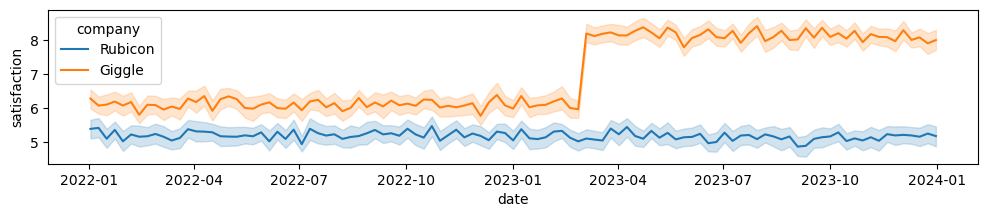

In [12]:
# confirm the change
plt.figure(figsize=(12,2))
sns.lineplot(data=march_onset_df, x="date", y="satisfaction", hue="company")

## 2.2 Question 1
Simulate a dataset in which **remote work was assosciated with a decrease in employee satisfaction**.

In [13]:
# take a copy of the default simulation parameters dictionary
remote_decrease_satisfation_parameters = default_simulation_parameters.copy()

# overwrite the parameter for negative remote_work_treatment_effect(equivalent to the association with a decrease in employee satisfaction)
remote_decrease_satisfation_parameters["remote_work_treatment_effect"] = -2

In [14]:
# look at the updated parameters 
remote_decrease_satisfation_parameters

{'num_employees_per_company': 50,
 'satisfaction_variance': 1,
 'data_collection_start_date': Timestamp('2022-01-01 00:00:00'),
 'data_collection_end_date': Timestamp('2023-12-31 00:00:00'),
 'remote_work_onset_date': Timestamp('2023-01-01 00:00:00'),
 'remote_work_treatment_effect': -2,
 'satisfaction_levels': {'Rubicon': 5.2, 'Giggle': 6.1}}

In [15]:
# simulate data with new parameters
remote_decrease_satisfation_df=simulate_data(remote_decrease_satisfation_parameters)

In [16]:
# look at the data
remote_decrease_satisfation_df.sample(5)

,date,company,satisfaction,employee_id,time_at_company,employee_age
9453,2023-08-13,Giggle,4.924890,G3,589,28
8128,2023-02-05,Giggle,2.895555,G28,400,24
1367,2022-07-10,Rubicon,6.439668,R17,190,36
4231,2023-08-13,Rubicon,5.833665,R31,589,29
6215,2022-05-15,Giggle,6.125773,G15,134,54


<Axes: xlabel='date', ylabel='satisfaction'>

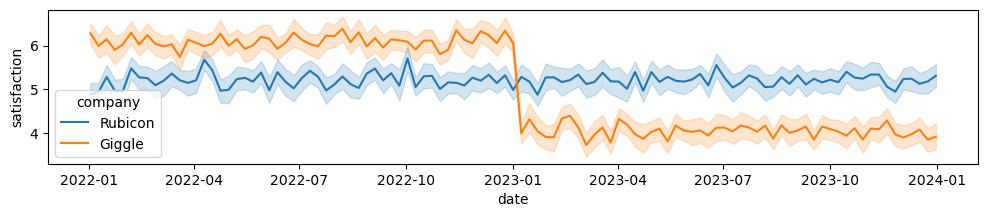

In [17]:
# confirm the change
plt.figure(figsize=(12,2))
sns.lineplot(data=remote_decrease_satisfation_df, x="date", y="satisfaction", hue="company")

In [18]:
# Additional Note (see below)

_The manipulation to the dataset has worked. While the simulated dataset was set to associated with a decrease in employee satisfaction, namely, a negative remote_work_treatment_effect(-2), a decrease trend has been demonstrated in the graph above. The satisfaction score has decreased since the treatment day and lasted for the rest of the time during the period of data collection. And the effect is quite evident as compared with the one in Example section, where the treatment effect was positive._ 

## 2.3 Question 2
Simulate a dataset in which **remote work begun much sooner after the data collection start date**. Illustrate clearly that the manipulation to the dataset has worked.

In [20]:
# take a copy of the default simulation parameters dictionary
much_sooner_onset_parameters = default_simulation_parameters.copy()

# The default date for data collection is 2022-01-01, and originally the remote work started at 2023-01-01.
# To meet the requirement of the prompt, the remote work begun much earlier than 2023-01-01, but should still after 2022-01-01.
# Let‘s try the date, 2022-03-01.

# overwrite the parameter for remote work onset within in our new copy of the parameters
much_sooner_onset_parameters["remote_work_onset_date"] = pd.to_datetime("2022-03-01")

In [21]:
# look at the updated parameters 
much_sooner_onset_parameters

{'num_employees_per_company': 50,
 'satisfaction_variance': 1,
 'data_collection_start_date': Timestamp('2022-01-01 00:00:00'),
 'data_collection_end_date': Timestamp('2023-12-31 00:00:00'),
 'remote_work_onset_date': Timestamp('2022-03-01 00:00:00'),
 'remote_work_treatment_effect': 2,
 'satisfaction_levels': {'Rubicon': 5.2, 'Giggle': 6.1}}

In [22]:
# simulate data with new parameters
much_sooner_onset_df=simulate_data(much_sooner_onset_parameters)

In [23]:
# look at the data
much_sooner_onset_df.sample(5)

,date,company,satisfaction,employee_id,time_at_company,employee_age
2228,2022-11-06,Rubicon,5.923113,R28,309,21
8084,2023-01-29,Giggle,7.498240,G34,393,57
3475,2023-04-30,Rubicon,5.194315,R25,484,53
5907,2022-04-03,Giggle,8.696635,G7,92,53
6644,2022-07-10,Giggle,8.021419,G44,190,43


<Axes: xlabel='date', ylabel='satisfaction'>

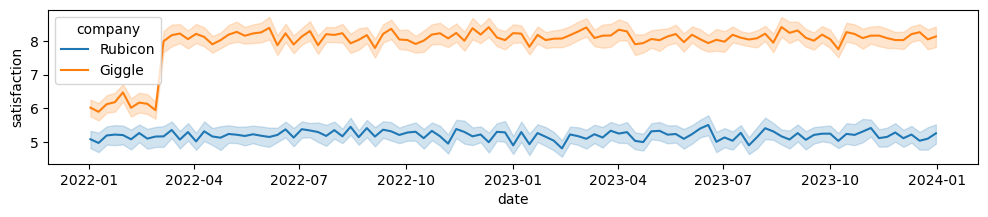

In [24]:
# confirm the change
plt.figure(figsize=(12,2))
sns.lineplot(data=much_sooner_onset_df, x="date", y="satisfaction", hue="company")

In [25]:
# Additional Note (see below)

_The manipulation to the dataset has worked. The simulated dataset was reset where remote work begun much sooner after the data collection start date ('2022-01-01'), in this case, '2022-03-01' was chosen. The remote work begun only two months after the data collection start date, which took a year(by default) or even more(in the sample) originally. This is also very evident in the visualization right above as the turning point of the new trend shifts towards the left-hand side._

---

# **Section 3** Regression analyses

## 3.1 Question 3
Using `statsmodels`, perform a regression analysis on a dataset simulated with the **default parameters**. The regression analysis should examine whether an employee's age predicts their satisfaction levels. Explain how the results of the analysis support the conclusion.  

In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
# Establish the formula
regression_formula = 'satisfaction ~ employee_age'
model = smf.ols(regression_formula, data=df_default)

In [42]:
# Fit the regression model
results = model.fit()

In [43]:
# Print the summary table
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.468
Date:                Thu, 03 Oct 2024   Prob (F-statistic):              0.226
Time:                        22:22:57   Log-Likelihood:                -19579.
No. Observations:               10500   AIC:                         3.916e+04
Df Residuals:                   10498   BIC:                         3.918e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.2168      0.050    123.443   

In [44]:
# Additional Note (See below)

_An employee's age does not predict their satisfaction levels. As demostrated by the above table, the absolute value of the coefficient of the employee_age is relatively small(close to zero). And even such a small effect is not statistically significant at an acceptable value（i.e.，0.05，0.1）. Besides, the confident interval includes the zero value, which again confirms that an employee's age could not predict their satisfaction levels. But I think this is also the expected outcome, as referring back to the process of generating data for employee's age, the values were randomly assigned. It is always the case that a random number could not predict another randomly generated number(the satisfaction). Otherwise, they are not the so-called "random" numbers. Last but not the least, the R-squared is zero, implying that the model did not have predictive power._

## 3.2 Question 4

1. Simulate a dataset using the default parameters.
2. Using `statsmodels`, perform a regression analysis with one dependent variable (`satisfaction`) and one predictor (`time_at_company`) to **examine whether employees who have been working longer are happier**.

What does the regression result show? Is the result accurate? Explain how the results of analysis support the conclusion and any limitations of the analysis.  

In [45]:
# Stmulate a dataset again using the default parameters
df_default_new = simulate_data(default_simulation_parameters)

In [46]:
# Necessary libararies has been imported in Question 3, so we don't have to import them again
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

In [47]:
# Establish the formula
regression_formula_new = 'satisfaction ~ time_at_company'
model_new = smf.ols(regression_formula_new, data=df_default_new)

In [48]:
# Fit the new regression model
results_new = model_new.fit()

In [49]:
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     892.7
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          2.46e-188
Time:                        22:34:42   Log-Likelihood:                -19022.
No. Observations:               10500   AIC:                         3.805e+04
Df Residuals:                   10498   BIC:                         3.806e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3986      0.029    1

In [50]:
# The above coefficient is too small, which might be resulted from the unit used ("day")

# Let's try a circumstance where time_at_company was represented by "year"
df_default_new["time_at_company_y"]= df_default_new["time_at_company"]/365

# Establish the formula
regression_formula_new = 'satisfaction ~ time_at_company_y'
model_new = smf.ols(regression_formula_new, data=df_default_new)
# Fit the new regression model
results_new = model_new.fit()
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     892.7
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          2.46e-188
Time:                        22:36:58   Log-Likelihood:                -19022.
No. Observations:               10500   AIC:                         3.805e+04
Df Residuals:                   10498   BIC:                         3.806e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.3986      0.02

In [51]:
# Additional Note (See below)

_At the first glance, the model seems to support the conclusion that "employees who have been working longer are happier. I was confused by this at the begining given that the data were generated randomly. However, after a second thought, I've figured out that those stay longer at the companies were also those who might possibly receive the treament we pre-set(if they are in the treatment group,the Giggle company). In this case, the overall satisfaction is "inflated" after a given time, when all the data mixed altogether for analysis. Therefore, the model is flawed to seperate the time effect (which is not random), and the DID model discussed below could work mcuh better in this aspect. By the way, the R-squared is samll, implying that the model could not predict the outcomes properly._

In [52]:
# To tell if my reseasoning is correct, here we could try a new dataset where treatment effect is zero. 
satisfation_parameters_no_effect = default_simulation_parameters.copy()
satisfation_parameters_no_effect["remote_work_treatment_effect"] = 0
df_no_effect = simulate_data(satisfation_parameters_no_effect)
# Establish the formula
regression_formula_no_effect = 'satisfaction ~ time_at_company'
model_no_effect = smf.ols(regression_formula_no_effect, data=df_no_effect)
results_model_no_effect = model_no_effect.fit()
print(results_model_no_effect.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.354
Date:                Thu, 03 Oct 2024   Prob (F-statistic):             0.0671
Time:                        22:43:00   Log-Likelihood:                -15855.
No. Observations:               10500   AIC:                         3.171e+04
Df Residuals:                   10498   BIC:                         3.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6232      0.021    2

In [53]:
# It shows no relationship now. And my reasoning is correct.

In [54]:
# Something beyond our simulation

_Theoretically, there were many possibilities for the outcome. Employees who have been working longer might not associated with higher or lower satisfaction scores. But it is possible that there is a positive correlation if those stay longer are mainly resulted from their loyalty and high satsfaction with the companies. However, it is also possible that those stay longer are become more and more unhappy with the companies, but for some reasons, they still stay in the companies and did not quit. Then a negative correlation emerged._

---

# **Section 4** Difference in Differences analyses

## 4.1 Question 5

1. Simulate a dataset in which remote work has a strong negative effect on employee satisfaction.
2. Using `statsmodels`, perform a Difference in Differences analysis to **examine the effect of remote work on satisfaction**.

What does the regression result show? Is the result accurate? Explain how the results of analysis support the conclusion.

In [62]:
# Stimulate a new dataset which remote work has a strong negative effect on employee satisfaction

## take a copy of the default simulation parameters dictionary
stong_neagtive_parameters = default_simulation_parameters.copy()

## Check the baseline to ensure chose a reasonable negative values. 
## Look at the baseine, and the value of -4 could be a godd choice.
stong_neagtive_parameters["remote_work_treatment_effect"]= -4

In [63]:
# look at the updated parameters 
stong_neagtive_parameters

{'num_employees_per_company': 50,
 'satisfaction_variance': 1,
 'data_collection_start_date': Timestamp('2022-01-01 00:00:00'),
 'data_collection_end_date': Timestamp('2023-12-31 00:00:00'),
 'remote_work_onset_date': Timestamp('2023-01-01 00:00:00'),
 'remote_work_treatment_effect': -4,
 'satisfaction_levels': {'Rubicon': 5.2, 'Giggle': 6.1}}

In [64]:
stong_neagtive_df=simulate_data(stong_neagtive_parameters)
stong_neagtive_df

,date,company,satisfaction,employee_id,time_at_company,employee_age
0,2022-01-02,Rubicon,5.053856,R0,1,52
1,2022-01-02,Rubicon,5.885893,R1,1,21
2,2022-01-02,Rubicon,4.258374,R2,1,21
3,2022-01-02,Rubicon,4.027964,R3,1,18
4,2022-01-02,Rubicon,6.009310,R4,1,23
...,...,...,...,...,...,...
10495,2023-12-31,Giggle,0.905752,G45,729,57
10496,2023-12-31,Giggle,3.229823,G46,729,59
10497,2023-12-31,Giggle,2.652730,G47,729,59
10498,2023-12-31,Giggle,0.722620,G48,729,31


<Axes: xlabel='date', ylabel='satisfaction'>

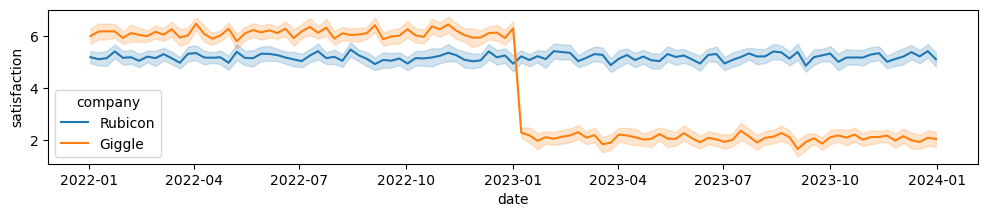

In [65]:
# confirm the change
plt.figure(figsize=(12,2))
sns.lineplot(data=stong_neagtive_df, x="date", y="satisfaction", hue="company")

In [66]:
# By default, remote_work_onset_date= 2023-01-01 00:00:00
remote_work_onset_date= pd.to_datetime("2023-01-01")

In [67]:
# Create dummy variables
stong_neagtive_df['post_treatment'] = (stong_neagtive_df['date'] > remote_work_onset_date).astype(int)
stong_neagtive_df['treatment_group'] = (stong_neagtive_df['company'] == 'Giggle').astype(int)

In [68]:
stong_neagtive_df.sample(10)

,date,company,satisfaction,employee_id,time_at_company,employee_age,post_treatment,treatment_group
10496,2023-12-31,Giggle,3.229823,G46,729,59,1,1
144,2022-01-16,Rubicon,5.283587,R44,15,18,0,0
7967,2023-01-15,Giggle,1.672606,G17,379,39,1,1
2220,2022-11-06,Rubicon,3.463370,R20,309,19,0,0
7793,2022-12-18,Giggle,5.571966,G43,351,53,0,1
3882,2023-06-25,Rubicon,5.449915,R32,540,34,1,0
4667,2023-10-15,Rubicon,4.354222,R17,652,23,1,0
562,2022-03-20,Rubicon,4.910582,R12,78,20,0,0
558,2022-03-20,Rubicon,3.581364,R8,78,49,0,0
6192,2022-05-08,Giggle,6.436148,G42,127,37,0,1


In [69]:
did_formula = 'satisfaction ~ post_treatment + treatment_group + post_treatment*treatment_group'

In [70]:
did_model = smf.ols(did_formula, data=stong_neagtive_df)
did_results = did_model.fit()
print(did_results.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     8153.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:54:22   Log-Likelihood:                -14841.
No. Observations:               10500   AIC:                         2.969e+04
Df Residuals:                   10496   BIC:                         2.972e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [48]:
## examine the effect of remote work on satisfaction

_The result shows that intercept, treatment_group, and the interactive term post_treatment*treatment_group are statistically significant. The Intercept shows the avaerage satisfaction of control group(Rubicon) before the treament day(nearly matched Rubicon's score 5.2). Intercept plus the treatment_group comes the treatment group (Giggle)'s satisfaction score before the treament date (matched 6.1). The post_treatment indicator is not statistically significant in this case._

_The effect of remote work on satisfaction is displayed by the interaction terms, which is pretty close to -4 (exactly the one value we have set at the beginning of data simulation). The performance of the DID model is quite good as the R-squared is 0.7._

## 4.2 Question 6

Use data simulation and DiD analyses to examine **whether the DiD analysis is robust to variations in the dataset**, such as the size of the dataset, the strength of the treatment effect, and the difference in baseline levels of satisfaction between the two companies. 

Do **not** need to analyze all of these factors, but analyses should **examine how at least one variable has an impact on the capacity of the DiD analysis to accurately detect the true effect of the remote work intervention**.  

In [71]:
# Necessary libararies has been imported in Question 3, so we don't have to import them again
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

In [74]:
# Try to do the manipulation manually (one by one) on size of the datase
# Let's try the default setting first
df_default_demo = df_default.copy()
remote_work_onset_date= pd.to_datetime("2023-01-01")
# And the corresponding default DID model
df_default_demo['post_treatment'] = (df_default_demo['date'] > remote_work_onset_date).astype(int)
df_default_demo['treatment_group'] = (df_default_demo['company'] == 'Giggle').astype(int)
df_default_demo.sample(10)

,date,company,satisfaction,employee_id,time_at_company,employee_age,post_treatment,treatment_group
7851,2023-01-01,Giggle,6.133468,G1,365,52,0,1
8354,2023-03-12,Giggle,7.644481,G4,435,50,1,1
4115,2023-07-30,Rubicon,4.318494,R15,575,33,1,0
2417,2022-12-04,Rubicon,6.191785,R17,337,33,0,0
805,2022-04-24,Rubicon,4.913599,R5,113,32,0,0
6352,2022-06-05,Giggle,6.516512,G2,155,20,0,1
2045,2022-10-09,Rubicon,4.601151,R45,281,38,0,0
7176,2022-09-25,Giggle,7.238588,G26,267,56,0,1
6417,2022-06-12,Giggle,5.891866,G17,162,31,0,1
4047,2023-07-16,Rubicon,3.521234,R47,561,42,1,0


In [75]:
did_formula = 'satisfaction ~ post_treatment + treatment_group + post_treatment*treatment_group'
did_model_demo = smf.ols(did_formula, data=df_default_demo)
did_results_demo = did_model_demo.fit()
print(did_results_demo.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     4997.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:05:22   Log-Likelihood:                -14922.
No. Observations:               10500   AIC:                         2.985e+04
Df Residuals:                   10496   BIC:                         2.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [77]:
# Begin to manipulate the size of the datasets
# Expand the size of the dataset (L here means Larger)
num_employees_L_parameters=default_simulation_parameters.copy()
num_employees_L_parameters["num_employees_per_company"] = 200
num_employees_L_df= simulate_data(num_employees_L_parameters)

In [78]:
# Similarly, prepare dummy variables for later DID analysis
remote_work_onset_date= pd.to_datetime("2023-01-01")
num_employees_L_df['post_treatment'] = (num_employees_L_df['date'] > remote_work_onset_date).astype(int)
num_employees_L_df['treatment_group'] = (num_employees_L_df['company'] == 'Giggle').astype(int)
num_employees_L_df.sample(10)

,date,company,satisfaction,employee_id,time_at_company,employee_age,post_treatment,treatment_group
29554,2022-10-23,Giggle,4.519462,G154,295,28,0,1
40760,2023-11-19,Giggle,7.266917,G160,687,47,1,1
5144,2022-06-26,Rubicon,6.220201,R144,176,58,0,0
32474,2023-02-05,Giggle,7.041340,G74,400,41,1,1
31455,2023-01-01,Giggle,6.718191,G55,365,59,0,1
18862,2023-10-22,Rubicon,7.467705,R62,659,35,1,0
5827,2022-07-24,Rubicon,3.914091,R27,204,47,0,0
18861,2023-10-22,Rubicon,6.634394,R61,659,58,1,0
37760,2023-08-06,Giggle,9.113765,G160,582,26,1,1
34626,2023-04-23,Giggle,6.766272,G26,477,20,1,1


In [79]:
# Perform the DID analyses on larger dataset
did_model_L = smf.ols(did_formula, data=num_employees_L_df)
did_results_L = did_model_L.fit()
print(did_results_L.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 1.944e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:08:45   Log-Likelihood:                -59727.
No. Observations:               42000   AIC:                         1.195e+05
Df Residuals:                   41996   BIC:                         1.195e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [85]:
# let's try smaller dataset size

# Begin to manipulate the size of the datasets
# Decrease the size of the dataset (S here means Small)
num_employees_S_parameters=default_simulation_parameters.copy()
num_employees_S_parameters["num_employees_per_company"] = 30
num_employees_S_df= simulate_data(num_employees_S_parameters)
remote_work_onset_date= pd.to_datetime("2023-01-01")
num_employees_S_df['post_treatment'] = (num_employees_S_df['date'] > remote_work_onset_date).astype(int)
num_employees_S_df['treatment_group'] = (num_employees_S_df['company'] == 'Giggle').astype(int)
num_employees_S_df.sample(10)

,date,company,satisfaction,employee_id,time_at_company,employee_age,post_treatment,treatment_group
4022,2022-07-24,Giggle,5.843885,G2,204,43,0,1
2915,2023-11-12,Rubicon,5.035775,R5,680,49,1,0
4923,2023-02-19,Giggle,8.033658,G3,414,27,1,1
5868,2023-09-24,Giggle,7.737370,G18,631,44,1,1
5124,2023-04-02,Giggle,9.773210,G24,456,20,1,1
3756,2022-05-22,Giggle,5.656828,G6,141,43,0,1
2794,2023-10-15,Rubicon,3.910319,R4,652,31,1,0
1524,2022-12-18,Rubicon,4.697491,R24,351,30,0,0
5769,2023-09-03,Giggle,6.691046,G9,610,52,1,1
4898,2023-02-12,Giggle,8.469248,G8,407,57,1,1


In [86]:
did_model_S = smf.ols(did_formula, data=num_employees_S_df)
did_results_S = did_model_S.fit()
print(did_results_S.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2926.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:20:47   Log-Likelihood:                -8868.3
No. Observations:                6300   AIC:                         1.774e+04
Df Residuals:                    6296   BIC:                         1.777e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [89]:
# let's try smaller dataset size

# Begin to manipulate the size of the datasets
# Decrease the size of the dataset (s here means smaller)
num_employees_s_parameters=default_simulation_parameters.copy()
num_employees_s_parameters["num_employees_per_company"] = 10
num_employees_s_df= simulate_data(num_employees_s_parameters)
remote_work_onset_date= pd.to_datetime("2023-01-01")
num_employees_s_df['post_treatment'] = (num_employees_s_df['date'] > remote_work_onset_date).astype(int)
num_employees_s_df['treatment_group'] = (num_employees_s_df['company'] == 'Giggle').astype(int)
num_employees_s_df.sample(10)

,date,company,satisfaction,employee_id,time_at_company,employee_age,post_treatment,treatment_group
205,2022-05-22,Rubicon,6.237281,R5,141,53,0,0
1435,2022-09-25,Giggle,7.342051,G5,267,50,0,1
786,2023-07-02,Rubicon,5.997104,R6,547,19,1,0
1513,2022-11-20,Giggle,6.355691,G3,323,43,0,1
1263,2022-05-29,Giggle,5.765894,G3,148,53,0,1
1675,2023-03-12,Giggle,7.855803,G5,435,57,1,1
147,2022-04-10,Rubicon,7.331843,R7,99,52,0,0
1700,2023-04-02,Giggle,6.952891,G0,456,21,1,1
14,2022-01-09,Rubicon,6.464313,R4,8,42,0,0
431,2022-10-30,Rubicon,3.757645,R1,302,30,0,0


In [91]:
did_model_s = smf.ols(did_formula, data=num_employees_s_df)
did_results_s = did_model_s.fit()
print(did_results_s.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     956.7
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:22:15   Log-Likelihood:                -2986.1
No. Observations:                2100   AIC:                             5980.
Df Residuals:                    2096   BIC:                             6003.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [82]:
# Additioanl Note(See below)

_The DiD analysis is relatively robust to variations in the dataset, at least for changes in the size of the dataset(and at least based on the parameters we have tested). According to the summary tables, the interactive terms are always statistically signicificant with a value of around 2 (almost a equivalent of the treatment effect). But as the size of the dataset changes, the values would change slightly, but not that much. Besides, the values of R-squared are relatively stable at around 0.58. This conclusion at the primary stage might not be very accurate and we would go through several rounds of changes of the parameters below._

In [92]:
# In order to make the repeated process more easy to execute, I combine it as an integrated function

import statsmodels.api as sm
import statsmodels.formula.api as smf
def variation(changed_variable, value):
    new_parameters = default_simulation_parameters.copy()
    new_parameters[changed_variable] = value
    df_variation = simulate_data(new_parameters)
    remote_work_onset_date= pd.to_datetime("2023-01-01")
    df_variation['post_treatment'] = (df_variation['date'] > remote_work_onset_date).astype(int)
    df_variation['treatment_group'] = (df_variation['company'] == 'Giggle').astype(int)
    did_formula = 'satisfaction ~ post_treatment + treatment_group + post_treatment*treatment_group'
    did_model_variation = smf.ols(did_formula, data=df_variation)
    did_results_variation = did_model_variation.fit()
    return print(did_results_variation.summary())

In [93]:
# Other Attempts-Let me change the the strength of the treatment effect, 
# and the difference in baseline levels of satisfaction between the two companies

In [94]:
# Try positive treatment with different strengths
variation("remote_work_treatment_effect",3)
variation("remote_work_treatment_effect",5)
variation("remote_work_treatment_effect",10)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     8845.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:26:31   Log-Likelihood:                -14938.
No. Observations:               10500   AIC:                         2.988e+04
Df Residuals:                   10496   BIC:                         2.991e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [95]:
# Additional note

_Again, when I changed the strength of the positive treatment effect, the interactive term could still capture the effect of treatment with a value that is almost the same. However, it is also worth noting that the R-squared increase along with the magtitute of treatment effect（at least for what I have observed so far）._

In [96]:
# Try neagtive treatment with different strengths
variation("remote_work_treatment_effect",-3)
variation("remote_work_treatment_effect",-5)
variation("remote_work_treatment_effect",-10)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4304.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:29:35   Log-Likelihood:                -14924.
No. Observations:               10500   AIC:                         2.986e+04
Df Residuals:                   10496   BIC:                         2.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [97]:
# Alright, the above conclusion holds true (and again, based on the obseravtions)

In [98]:
# Lastly, let's try the difference in baseline levels of satisfaction between the two companies.
# Let me try the the difference in baseline levels of satisfaction
variation("satisfaction_levels",{'Rubicon': 5.2, 'Giggle': 6.1})
variation("satisfaction_levels",{'Rubicon': 2, 'Giggle': 6.1})
variation("satisfaction_levels",{'Rubicon': 1, 'Giggle': 6.1})
variation("satisfaction_levels",{'Rubicon': 0.2, 'Giggle': 6.1})

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     4817.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:32:30   Log-Likelihood:                -14962.
No. Observations:               10500   AIC:                         2.993e+04
Df Residuals:                   10496   BIC:                         2.996e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [101]:
# Additioanl note (See below)

_Based on the observations, the interactive terms in the models could alwyas capture the treatment effect with a relatively accurate value. And the R-squared seems to enlarged as the gap expanded._

In [102]:
# Let me narrow the distance betwwen the two
variation("satisfaction_levels",{'Rubicon': 5.9, 'Giggle': 6.1})
variation("satisfaction_levels",{'Rubicon': 5.95, 'Giggle': 6.1})
variation("satisfaction_levels",{'Rubicon': 6, 'Giggle': 6.1})
variation("satisfaction_levels",{'Rubicon': 6.05, 'Giggle': 6.1})

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3010.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:36:23   Log-Likelihood:                -14896.
No. Observations:               10500   AIC:                         2.980e+04
Df Residuals:                   10496   BIC:                         2.983e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [103]:
# Additioanl note (See below)

_Based on the observations, when the gap narrows down, the interactive terms in the models could still capture the treatment effects. And the R-squared seems to contracted as the gap decreased._

### **Conclusion to Q6**
The conclusion to question 6 goes here

_In the above section, we have tried the adjustments on several variations in the dataset, such as the size of the dataset, the strength of the treatment effect, and the difference in baseline levels of satisfaction between the two companies.The results show that the DiD analyses could always capture the treatment effects, as demostrated by the almost identical values with the treatment effcts in their interactive terms(and statistically significant). But it is worth mentioning that the values of effects detected could change slightly, but overall, they have no huge discrepancies. In addition, effects of the single "post_treatment" vary as the variables changed, namely, it could sometimes be statistically significant and could sometimes not. And the R-squared also changed along with the adjustments.Lastly, the model is sensitive towards changes in the different parameters(more details could be seen in the each analyse section)._